In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 2. Load the dataset
# Assume you have 'Google_Stock_Price.csv'
data = pd.read_csv('Downloads/GOOGL.csv')
print(data.head())

         Date       Open       High        Low      Close  Adj Close    Volume
0  2004-08-19  50.050049  52.082081  48.028027  50.220219  50.220219  44659096
1  2004-08-20  50.555557  54.594597  50.300301  54.209209  54.209209  22834343
2  2004-08-23  55.430431  56.796799  54.579578  54.754753  54.754753  18256126
3  2004-08-24  55.675674  55.855858  51.836838  52.487488  52.487488  15247337
4  2004-08-25  52.532532  54.054054  51.991993  53.053055  53.053055   9188602


In [3]:
# 3. Extract "Open" prices for prediction
prices = data['Open'].values
prices = prices.reshape(-1,1)

In [4]:
# 4. Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_prices = scaler.fit_transform(prices)

In [5]:
# 5. Create time series data
def create_sequences(dataset, time_steps=60):
    X = []
    y = []
    for i in range(time_steps, len(dataset)):
        X.append(dataset[i-time_steps:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X, y = create_sequences(scaled_prices, time_steps)

# Reshape for RNN input: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [6]:
# 6. Split into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [13]:
model = keras.Sequential([
    keras.Input(shape=(60, 1)),
    layers.SimpleRNN(50, activation='tanh', return_sequences=True),
    layers.SimpleRNN(50, activation='tanh'),
    layers.Dense(1)
])

In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,701 (30.08 KB)

 Trainable params: 7,701 (30.08 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.2363e-05 - val_loss: 0.0050
Epoch 2/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.1089e-05 - val_loss: 0.0038
Epoch 3/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.9238e-05 - val_loss: 0.0041
Epoch 4/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.7930e-05 - val_loss: 0.0039
Epoch 5/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.1367e-05 - val_loss: 0.0042
Epoch 6/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.6688e-05 - val_loss: 0.0037
Epoch 7/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.8531e-05 - val_loss: 0.0025
Epoch 8/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.3061e-05 - val_loss: 0.0031
Epoch 9/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.8519e-05 - val_loss: 0.0032
Epoch 10/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.5547e-05 - val_loss: 0.0029
Epoch 11/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 1.2743e-05 - val_loss: 0.00

In [20]:
# 9. Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"\nTest Loss (MSE): {loss:.4f}")

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.0285e-04

Test Loss (MSE): 0.0033


In [21]:
# 11. Make predictions
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1,1))


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


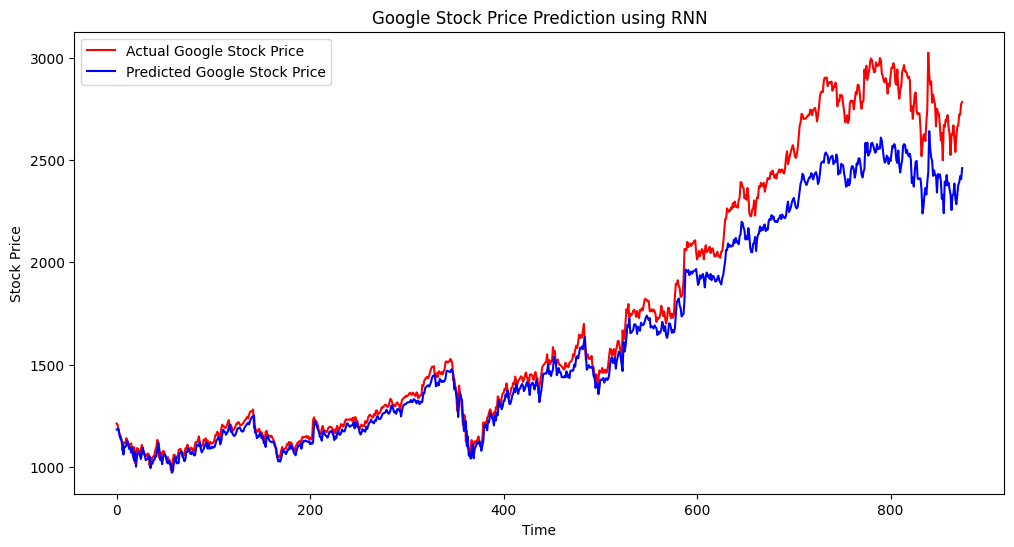

In [22]:
# 12. Plot predictions vs real prices
plt.figure(figsize=(12,6))
plt.plot(actual_stock_price, color='red', label='Actual Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()